In [ ]:
from google.colab import drive #подключаемся к гугл диску
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

 0395097.jpg	       2.2.ipynb   6.jpg
 11.jpg		       2.ipynb	   7.jpg
 12.png		       2.jpg	  'Colab Notebooks'
 13.jpg		       360.jpg	   dlib_face_recognition_resnet_model_v1.dat
 14.jpg		       3.ipynb	   shape_predictor_68_face_landmarks.dat
 1556752-1590358.jpg   3.jpg	   test.csv
 15.jpg		       4.jpg	   titanic.csv
 1.jpg		       5.jpg	   train.csv


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/train.csv") #загружаем данные и выводим их

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
features = data.drop(columns=['Id','SalePrice','Alley','PoolQC','Fence','MiscFeature'])
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [ ]:
from sklearn.impute import SimpleImputer #переводим в числовые данные с помощью LabelEncoder
from sklearn import preprocessing
features[features.columns] = SimpleImputer(strategy="most_frequent").fit_transform(features[features.columns])
df = pd.DataFrame(features)
features = df.apply(preprocessing.LabelEncoder().fit_transform)
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,128,2,4,2,2,3,3,2,361,5,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,2,1,89,1,2,220,4,4,2,0,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,2,0,3,4,1,2,3,1,0,482,5,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,4,1,62,1,2,149,4,4,2,187,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,104,2,4,2,2,3,2,2,222,5,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,4,1,87,1,2,260,4,4,2,0,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,2,0,3,4,0,3,1,3,0,66,5,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,84,2,3,284,4,4,2,0,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,221,2,4,2,2,3,0,2,328,5,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,4,1,86,1,3,380,4,4,2,118,70,0,0,0,0,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,0,4,0,8,2,2,0,5,5,4,100,50,1,1,12,13,2,0,3,4,2,2,3,3,5,0,5,0,570,238,1,0,1,4,201,143,0,489,0,0,2,1,3,1,3,5,6,1,4,1,85,1,2,149,4,4,2,0,28,0,0,0,0,0,7,1,8,4
1456,0,3,56,866,1,3,3,0,4,0,14,2,2,0,2,5,5,79,38,1,1,9,10,3,72,3,4,1,2,3,3,0,407,4,29,376,577,1,4,1,4,723,0,0,694,1,0,2,0,3,1,3,5,2,2,4,1,64,2,2,182,4,4,2,214,0,0,0,0,0,0,1,4,8,4
1457,6,3,37,415,1,3,3,0,4,0,6,2,2,0,5,6,8,44,56,1,1,5,5,2,0,0,2,4,3,1,3,2,95,5,0,536,375,1,0,1,4,378,354,0,767,0,0,2,0,4,1,2,7,6,2,2,1,29,1,1,24,4,4,2,0,48,0,0,0,0,17,4,4,8,4
1458,0,3,39,505,1,3,3,0,4,0,12,2,2,0,2,4,5,51,46,3,1,8,8,2,0,3,4,1,3,3,2,2,14,4,134,0,325,1,2,1,0,296,0,0,147,1,0,1,0,2,1,2,3,6,0,2,1,36,2,1,19,4,4,2,224,0,38,0,0,0,0,3,4,8,4


Нормирование данных.

In [ ]:
# Среднее значение
mymean = features.mean(axis=0)
# Стандартное отклонение
mystd = features.std(axis=0)
features -= mymean
features /= mystd
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.200281,-0.045516,-0.154108,-0.549026,0.064216,0.750473,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.075290,0.878367,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.784162,-0.777709,0.364083,0.835313,-0.324041,0.280952,0.628696,-0.429771,0.780188,0.307210,-0.305057,-1.106830,-0.617087,-0.123004,-0.884355,0.263722,0.302300,-0.944656,1.212165,-0.114562,0.621770,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,0.913976,0.255890,-0.950901,-0.429882,-0.686541,0.939768,-0.281790,0.311618,0.443729,0.215572,0.185955,0.289646,-0.748781,0.279022,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,0.138730,0.31376,0.208431
1,-1.001078,-0.045516,0.632964,0.019611,0.064216,0.750473,0.314559,-0.026171,-0.628101,-0.225639,1.953633,-1.187667,-0.031729,-0.41155,-0.543271,-0.071812,2.178881,0.139491,-0.429430,-0.491347,-0.125754,-0.508077,-0.660833,0.386914,-0.647116,0.663224,0.364083,-0.548974,-0.324041,0.280952,-1.128044,-1.518177,1.378954,0.307210,-0.305057,-0.692339,0.703255,-0.123004,-0.884355,0.263722,0.302300,0.473539,-0.700323,-0.114562,-0.534735,-0.819684,3.947457,0.789470,-0.761360,0.165354,-0.211381,0.795356,-0.318731,0.255890,0.600289,1.791811,-0.686541,-0.173215,-0.281790,0.311618,-0.166310,0.215572,0.185955,0.289646,1.845208,-0.744106,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-0.488943,-0.614228,0.31376,0.208431
2,0.200281,-0.045516,0.003306,0.697984,0.064216,-1.378460,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.005972,0.829930,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.515798,-0.777709,0.364083,0.835313,-0.324041,0.280952,-0.249674,-0.429771,0.092350,0.307210,-0.305057,-0.202887,-0.440705,-0.123004,-0.884355,0.263722,0.302300,-0.731684,1.269869,-0.114562,0.787593,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,-0.318731,0.255890,0.600289,1.791811,-0.686541,0.857324,-0.281790,0.311618,0.787413,0.215572,0.185955,0.289646,-0.748781,-0.117701,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,0.990552,0.138730,0.31376,0.208431
3,0.440553,-0.045516,-0.416465,-0.010318,0.064216,-1.378460,0.314559,-0.026171,-1.860664,-0.225639,-1.039515,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,-1.870743,-0.720051,-0.491347,-0.125754,1.055567,1.316250,0.386914,-0.647116,0.663224,0.364083,-1.933261,0.832683,-2.791627,0.628696,-1.518177,-0.679612,0.307210,-0.305057,0.096957,-0.929534,-0.123004,0.265385,0.263722,0.302300,-0.586477,0.783504,-0.114562,0.643030,1.107431,-0.240978,-1.025689,-0.761360,0.165354,-0.211381,-0.409229,0.297623,0.255890,0.600289,-0.429882,1.586361,0.733660,0.949987,1.649742,0.993623,0.215572,0.185955,0.289646,-0.748781,-0.242982,4.282540,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,-1.367186,0.31376,-3.425110
4,0.200281,-0.045516,0.842850,1.439539,0.064216,-1.378460,0.314559,-0.026171,-0.628101,-0.225639,0.457059,-0.036277,-0.031729,-0.41155,1.026338,1.374324,-0.517023,0.971313,0.733056,-0.491347,-0.125754,0.742838,0.751369,-1.241024,1.824075,-0.777709,0.364083,0.835313,-0.324041,0.280952,-2.006414,-0.429771,0.616888,0.307210,-0.305057,-0

In [ ]:
features.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-3.254626e-17,-4.601627e-16,9.011057e-17,4.568264e-17,6.849734e-16,1.829587e-16,-2.128434e-16,1.765758e-16,1.622751e-16,-1.555073e-17,5.938933e-17,2.856828e-16,7.390968e-16,-2.482793e-16,-1.641001e-16,2.068361e-16,4.050033e-16,-1.282650e-16,2.942851e-17,5.175084e-16,-5.706622e-16,4.836314e-16,-6.326750e-17,6.083414e-19,5.516135e-16,-2.345916e-16,6.172384e-16,3.117750e-17,-2.387740e-17,7.170064e-16,1.060035e-16,-6.494044e-17,-4.167138e-17,-3.315461e-16,1.735294e-16,-1.977109e-18,1.110983e-16,8.328003e-16,-1.056233e-16,2.628035e-16,-2.226910e-16,-1.126192e-16,8.668865e-17,2.465684e-16,-6.136644e-17,-4.897148e-17,1.373711e-16,8.881784e-17,6.509253e-17,1.852400e-16,4.276640e-16,-8.022502e-17,-2.253525e-16,-3.208240e-16,2.920039e-17,-2.587732e-16,-2.139841e-16,-5.132880e-17,9.809505e-17,-1.825024e-18,7.558642e-17,-2.512070e-16,-1.792706e-16,1.513249e-17,9.185955e-17,7.961668e-17,1.171818e-16,5.404923e-16,1.618949e-16,7.637441e-16,-5.691794e-17,6.681299e-17,9.467313e-18,-2.531461e-16,-9.889350e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.001078e+00,-4.792221e+00,-2.043081e+00,-1.636418e+00,-1.556173e+01,-1.378460e+00,-3.924730e+00,-2.617120e-02,-1.860664e+00,-2.256388e-01,-2.037231e+00,-2.339058e+00,-7.752546e+00,-4.115498e-01,-1.589676e+00,-3

In [ ]:
y = data.iloc[:, 80]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state = 42) #загружаем данные и делим их на тестовые и обучающие

In [ ]:
!pip install -q -U keras-tuner #Керас Тюнер

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(x_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=5, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(x_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 01s]
val_mae: 181013.34375

Best val_mae So Far: 181013.34375
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 800
Score: 181013.34375
Trial summary
Hyperparameters:
units_input: 512
Score: 181286.65625
Trial summary
Hyperparameters:
units_input: 384
Score: 181403.375
Trial summary
Hyperparameters:
units_input: 320
Score: 181456.59375
Trial summary
Hyperparameters:
units_input: 192
Score: 181542.578125


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               60800     
                                                                 
 dense_1 (Dense)             (None, 1)                 801       
                                                                 
Total params: 61,601
Trainable params: 61,601
Non-trainable params: 0
_________________________________________________________________
16/16 [==============================] - 0s 2ms/step - loss: 39652462592.0000 - mae: 179980.8594

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               38912     
                                                                 
 dense_1 (Dense)             (None, 1)                 513       


In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(x_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(x_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 05s]
val_mae: 83573.359375

Best val_mae So Far: 75665.3359375
Total elapsed time: 00h 00m 20s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 576
Score: 75665.3359375
Trial summary
Hyperparameters:
units_input: 864
units_hidden: 576
Score: 83573.359375
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 352
Score: 88587.8359375
Trial summary
Hyperparameters:
units_input: 832
units_hidden: 416
Score: 91430.0625
Trial summary
Hyperparameters:
units_input: 704
units_hidden: 320
Score: 112195.9296875


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              77824     
                                                                 
 dense_1 (Dense)             (None, 576)               590400    
                                                                 
 dense_2 (Dense)             (None, 1)                 577       
                                                                 
Total params: 668,801
Trainable params: 668,801
Non-trainable params: 0
_________________________________________________________________
16/16 [==============================] - 0s 3ms/step - loss: 7198713344.0000 - mae: 71883.9922

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 864)               65664     


In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(x_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        826M        9.6G        1.2M        2.3G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner3.search(x_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 03s]
val_mae: 119465.890625

Best val_mae So Far: 78397.625
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 992
units_hidden: 576
optimizer: adam
Score: 78397.625
Trial summary
Hyperparameters:
activation: selu
units_input: 1024
units_hidden: 576
optimizer: adam
Score: 103116.921875
Trial summary
Hyperparameters:
activation: relu
units_input: 1024
units_hidden: 192
optimizer: adam
Score: 119465.890625
Trial summary
Hyperparameters:
activation: relu
units_input: 576
units_hidden: 512
optimizer: rmsprop
Score: 150679.75
Trial summary
Hyperparameters:
activation: tanh
units_input: 576
units_hidden: 256
optimizer: rmsprop
Score: 181616.953125


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 992)               75392     
                                                                 
 dense_1 (Dense)             (None, 576)               571968    
                                                                 
 dense_2 (Dense)             (None, 1)                 577       
                                                                 
Total params: 647,937
Trainable params: 647,937
Non-trainable params: 0
_________________________________________________________________
16/16 [==============================] - 0s 3ms/step - loss: 7656065024.0000 - mae: 74729.8984

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              77824     


In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(x_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory5' # каталог, куда сохраняются обученные сети
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                2432      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner4.search(x_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 04s]
val_mae: 55905.88671875

Best val_mae So Far: 55905.88671875
Total elapsed time: 00h 00m 20s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: elu
units_input: 1024
hidden_layers: 3
layer_0_units_: 480
optimizer: adam
layer_1_units_: 240
layer_2_units_: 157
Score: 55905.88671875
Trial summary
Hyperparameters:
activation: elu
units_input: 32
hidden_layers: 3
layer_0_units_: 480
optimizer: rmsprop
layer_1_units_: 80
layer_2_units_: 157
Score: 87041.625
Trial summary
Hyperparameters:
activation: elu
units_input: 32
hidden_layers: 3
layer_0_units_: 480
optimizer: adam
layer_1_units_: 240
layer_2_units_: 10
Score: 92259.7578125
Trial summary
Hyperparameters:
activation: elu
units_input: 448
hidden_layers: 2
layer_0_units_: 480
optimizer: adam
layer_1_units_: 16
Score: 95910.6875
Trial summary
Hyperparameters:
activation: relu
units_input: 544
hidden_layers: 1
layer_0_units_: 96
optimizer: adam
Score: 164301.703125


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              77824     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 480)               492000    
                                                                 
 dense_2 (Dense)             (None, 240)               115440    
                                                                 
 dense_3 (Dense)             (None, 157)               37837     
                                                                 
 dense_4 (Dense)             (None, 1)                 158       
                                                                 
Total params: 723,259
Trainable params: 723,259
Non-trai

In [ ]:
for model in models4: #загружаем лучшую модель 
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              77824     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 480)               492000    
                                                                 
 dense_2 (Dense)             (None, 240)               115440    
                                                                 
 dense_3 (Dense)             (None, 157)               37837     
                                                                 
 dense_4 (Dense)             (None, 1)                 158       
                                                                 
Total params: 723,259
Trainable params: 723,259
Non-trai

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              77824     
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 480)               492000    
                                                                 
 dense_7 (Dense)             (None, 240)               115440    
                                                                 
 dense_8 (Dense)             (None, 157)               37837     
                                                                 
 dense_9 (Dense)             (None, 1)                 158       
                                                                 
Total params: 723,259
Trainable params: 723,259
Non-tr

In [ ]:
best_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2) #обучаем модель

Epoch 1/10
25/25 [==============================] - 1s 24ms/step - loss: 38624153600.0000 - mae: 180808.2812 - val_loss: 37947645952.0000 - val_mae: 181155.3125
Epoch 2/10
25/25 [==============================] - 0s 13ms/step - loss: 35627876352.0000 - mae: 174840.6406 - val_loss: 27950231552.0000 - val_mae: 159493.7188
Epoch 3/10
25/25 [==============================] - 0s 15ms/step - loss: 15965642752.0000 - mae: 115500.3672 - val_loss: 11307545600.0000 - val_mae: 94620.8125
Epoch 4/10
25/25 [==============================] - 0s 12ms/step - loss: 7645640704.0000 - mae: 70605.6094 - val_loss: 6123607040.0000 - val_mae: 61766.4883
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 5813535744.0000 - mae: 59566.8477 - val_loss: 5926296576.0000 - val_mae: 59680.9609
Epoch 6/10
25/25 [==============================] - 0s 13ms/step - loss: 5311304704.0000 - mae: 56683.5820 - val_loss: 5701785088.0000 - val_mae: 58175.7461
Epoch 7/10
25/25 [=============================

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(x_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.7456100031926759


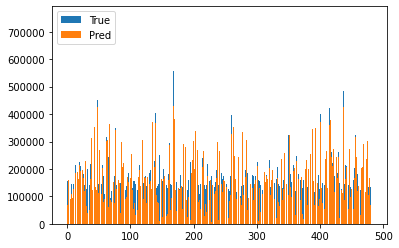

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [ ]:
model = Sequential() #создаем нашу модель
model.add(Dense(4096, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dense(512, activation="relu"))

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
25/25 [==============================] - 2s 39ms/step - loss: 38603763712.0000 - mae: 180749.6875 - val_loss: 37866180608.0000 - val_mae: 180906.8750
Epoch 2/10
25/25 [==============================] - 1s 28ms/step - loss: 35116818432.0000 - mae: 172940.4219 - val_loss: 24944949248.0000 - val_mae: 150567.8906
Epoch 3/10
25/25 [==============================] - 1s 28ms/step - loss: 12870767616.0000 - mae: 95195.4141 - val_loss: 5815758336.0000 - val_mae: 63202.4844
Epoch 4/10
25/25 [==============================] - 1s 27ms/step - loss: 4220575488.0000 - mae: 51623.2617 - val_loss: 3392990208.0000 - val_mae: 45740.0391
Epoch 5/10
25/25 [==============================] - 1s 28ms/step - loss: 2599708928.0000 - mae: 39178.6602 - val_loss: 2506429440.0000 - val_mae: 38491.1797
Epoch 6/10
25/25 [==============================] - 1s 28ms/step - loss: 1839584256.0000 - mae: 31820.2656 - val_loss: 2020556416.0000 - val_mae: 33618.5234
Epoch 7/10
25/25 [==============================]

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              311296    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,484,993
Trainable params: 2,484,993
Non-trainable params: 0
______________________________________________

In [ ]:
pred = model.predict(x_test)

In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
print("Предсказанная стоимость:", pred[0][0], ", правильная стоимость:", y_test[0])

Предсказанная стоимость: 142743.08 , правильная стоимость: 154500


In [ ]:
vec = np.array([])
for i in np.arange(0, len(pred)):
  vec = np.append(vec, pred[i][0])
vec 

array([142743.078125  , 343677.21875   , 121309.0625    , 172422.21875   ,
       325433.625     , 111047.15625   , 198611.984375  , 124056.9140625 ,
       121433.890625  , 157440.234375  , 130319.546875  , 134131.296875  ,
        36569.0078125 , 203696.390625  , 150942.359375  , 118236.6171875 ,
       200016.546875  ,  97758.5859375 , 170152.125     , 230268.140625  ,
       160900.609375  , 208154.234375  , 169412.515625  , 115642.9296875 ,
       213845.1875    , 157869.734375  , 188275.40625   , 121252.6640625 ,
       182392.984375  , 222532.4375    , 143904.265625  , 255024.921875  ,
       209878.375     , 117103.421875  , 282600.03125   , 129355.1484375 ,
        86184.9375    , 195314.40625   , 322144.59375   , 120395.453125  ,
       111760.4453125 , 240134.671875  , 126739.0546875 , 345680.46875   ,
       118595.1640625 , 144902.5625    , 105561.9375    , 130790.65625   ,
       392284.0625    , 126425.296875  , 140893.625     , 256647.796875  ,
        87522.6953125 , 2

In [ ]:
diff = np.array([])

for i in np.arange(0, len(y_test)):
    diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
np.sort(diff)[-10:-1]

array([112888.015625  , 115883.1875    , 139283.96875   , 142361.04296875,
       145231.65625   , 158745.70703125, 162552.79296875, 191242.1875    ,
       261858.59375   ])

In [ ]:
vec

array([142743.078125  , 343677.21875   , 121309.0625    , 172422.21875   ,
       325433.625     , 111047.15625   , 198611.984375  , 124056.9140625 ,
       121433.890625  , 157440.234375  , 130319.546875  , 134131.296875  ,
        36569.0078125 , 203696.390625  , 150942.359375  , 118236.6171875 ,
       200016.546875  ,  97758.5859375 , 170152.125     , 230268.140625  ,
       160900.609375  , 208154.234375  , 169412.515625  , 115642.9296875 ,
       213845.1875    , 157869.734375  , 188275.40625   , 121252.6640625 ,
       182392.984375  , 222532.4375    , 143904.265625  , 255024.921875  ,
       209878.375     , 117103.421875  , 282600.03125   , 129355.1484375 ,
        86184.9375    , 195314.40625   , 322144.59375   , 120395.453125  ,
       111760.4453125 , 240134.671875  , 126739.0546875 , 345680.46875   ,
       118595.1640625 , 144902.5625    , 105561.9375    , 130790.65625   ,
       392284.0625    , 126425.296875  , 140893.625     , 256647.796875  ,
        87522.6953125 , 2

In [ ]:
sorted = np.sort(pred, )
sorted

array([[142743.08 ],
       [343677.22 ],
       [121309.06 ],
       [172422.22 ],
       [325433.62 ],
       [111047.16 ],
       [198611.98 ],
       [124056.914],
       [121433.89 ],
       [157440.23 ],
       [130319.55 ],
       [134131.3  ],
       [ 36569.008],
       [203696.39 ],
       [150942.36 ],
       [118236.62 ],
       [200016.55 ],
       [ 97758.586],
       [170152.12 ],
       [230268.14 ],
       [160900.61 ],
       [208154.23 ],
       [169412.52 ],
       [115642.93 ],
       [213845.19 ],
       [157869.73 ],
       [188275.4  ],
       [121252.664],
       [182392.98 ],
       [222532.44 ],
       [143904.27 ],
       [255024.92 ],
       [209878.38 ],
       [117103.42 ],
       [282600.03 ],
       [129355.15 ],
       [ 86184.94 ],
       [195314.4  ],
       [322144.6  ],
       [120395.45 ],
       [111760.445],
       [240134.67 ],
       [126739.055],
       [345680.47 ],
       [118595.164],
       [144902.56 ],
       [105561.94 ],
       [13079

In [ ]:
for i in np.arange(0, len(y_test)):
    print("Предсказанная стоимость:", pred[i][0], ", правильная стоимость:", y_test[i], 'разница: ', np.abs(pred[i][0] - y_test[i]))

Предсказанная стоимость: 142743.08 , правильная стоимость: 154500 разница:  11756.921875
Предсказанная стоимость: 343677.22 , правильная стоимость: 325000 разница:  18677.21875
Предсказанная стоимость: 121309.06 , правильная стоимость: 115000 разница:  6309.0625
Предсказанная стоимость: 172422.22 , правильная стоимость: 159000 разница:  13422.21875
Предсказанная стоимость: 325433.62 , правильная стоимость: 315500 разница:  9933.625
Предсказанная стоимость: 111047.16 , правильная стоимость: 75500 разница:  35547.15625
Предсказанная стоимость: 198611.98 , правильная стоимость: 311500 разница:  112888.015625
Предсказанная стоимость: 124056.914 , правильная стоимость: 146000 разница:  21943.0859375
Предсказанная стоимость: 121433.89 , правильная стоимость: 84500 разница:  36933.890625
Предсказанная стоимость: 157440.23 , правильная стоимость: 135500 разница:  21940.234375
Предсказанная стоимость: 130319.55 , правильная стоимость: 145000 разница:  14680.453125
Предсказанная стоимость: 13413

In [ ]:
СС_tuner = np.corrcoef(vec, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициаент корреляция с истинными данными: {СС_tuner}')

Коэффициаент корреляция с истинными данными: 0.8554497526486461
